# Week 3, Day 1 (Dataset Preparation and Arrangement)
> Welcome to first day (Week 3) of the McE-51069 course.
- sticky_rank: 6
- toc: true
- badges: false
- comments: false
- categories: [deep_learning, computer_vision]

You can download resources for today from this [link](https://github.com/ytu-cvlab/mce-51069-week3-day1/archive/main.zip). We have also posted a [guide video](https://www.youtube.com/watch?v=hIaURCPvCf4) on downloading and accessing materials on [youtube channel](https://www.youtube.com/channel/UCDFhKEbfpxKXVk4Mryh7yhA).

## [Datasets](#data)
### [Brief Introduction to Pandas](#pandas)
### [Understanding your dataset](#Uyd)
### [Slicing data](#slice)
### [Feature visualization](#featureviz)
### [Training the model](#train)
### [Model evaluation](#evalute)
### [Feature Engineering](#engineer)
## [Annotations](#annotate)
### [Image Datasets](#imagedata)
### [Annotation tools](#tools)

<a id=data></a>
# Datasets

Datasets comes in different forms from various sources. So the question here is what exactly is a dataset and how do we handle datasets for machine learning? To experiment the conditions, we must first know how to manipulate a dataset.

<a id=pandas></a>
## Brief Introduction to Pandas 

Pandas is a python library for data manipulation and analysis. In this section, we will feature a brief introuction to pandas.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline

Pandas stores data in dataframe objects. We can assign columns to each to numpy array (or) list to create a dataframe.

In [70]:
#Create a dataframe 

names = ['Jack','Jean','Jennifer','Jimmy']
ages = np.array([23,22,24,21])
# print(type(names))
# print(type(ages))

df = pd.DataFrame({'name': names,
                   'age': ages,
                   'city': ['London', 'Berlin', 'New York', 'Sydney']},index=None)

df.head()
# df.style.hide_index()

name,age,city
Jack,23,London
Jean,22,Berlin
Jennifer,24,New York
Jimmy,21,Sydney


Now, let's see some handy dataframe tricks.

In [71]:
df[['name','city']]

,name,city
0,Jack,London
1,Jean,Berlin
2,Jennifer,New York
3,Jimmy,Sydney


In [74]:
df.info()
# print(df.columns)
# print(df.age)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int32 
 2   city    4 non-null      object
dtypes: int32(1), object(2)
memory usage: 208.0+ bytes


Now that we know how to create a dataframe, we can save the dataframe we created.

In [73]:
df.to_csv('Ages_and_cities.csv',index=False,header=True)

In [64]:
df = pd.read_csv('Ages_and_cities.csv')
df.head()

,name,age,city
0,Jack,23,London
1,Jean,22,Berlin
2,Jennifer,24,New York
3,Jimmy,21,Sydney


<a id=Uyd></a>
## Understanding your dataset

In this section, we used [Iris flowers dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which contains petal and sepal measurements of three species of Iris flowers.

#### Three species of Iris flowers from the dataset

![](images/iris.png)

#### Sepal vs Petal

This dataset was introduced by biologist Ronald Fisher in his 1936 paper. The following figure explains the way length and width are mesured or petal and speal of each flower. 

![](images/sepal_petal.jpg)

[Image source](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)

When we observe the dataset, we will discover that the dataset has four features and three unique labels for three flowers.

In [8]:
df = pd.read_csv('iris_data.csv')
df.head()
# df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


<a id=slice></a>
## Slicing data

Now that we understand our dataset, let's prepare to seperate our data based on labels for unique visualization.

In [10]:
# df.loc[:3]
df.loc[80:85,("sepal_length","variety")]

,sepal_length,variety
80,5.5,Versicolor
81,5.5,Versicolor
82,5.8,Versicolor
83,6.0,Versicolor
84,5.4,Versicolor
85,6.0,Versicolor


In [11]:
# df.iloc[146:]
# df.iloc[80:85,2:5]
df.iloc[80:85,[0,4]]

,sepal_length,variety
80,5.5,Versicolor
81,5.5,Versicolor
82,5.8,Versicolor
83,6.0,Versicolor
84,5.4,Versicolor


In [13]:
Se= df.loc[df.variety =='Setosa', :]
Vc= df.loc[df.variety =='Versicolor', :]
Vi= df.loc[df.variety =='Virginica', :]
Vi.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica


<a id=featureviz></a>
## Feature visualization

In [76]:
df = pd.read_csv('iris_data.csv')
# df.dtypes

First, we will visualize each measurement with histograms to observe the output distribution for each class.

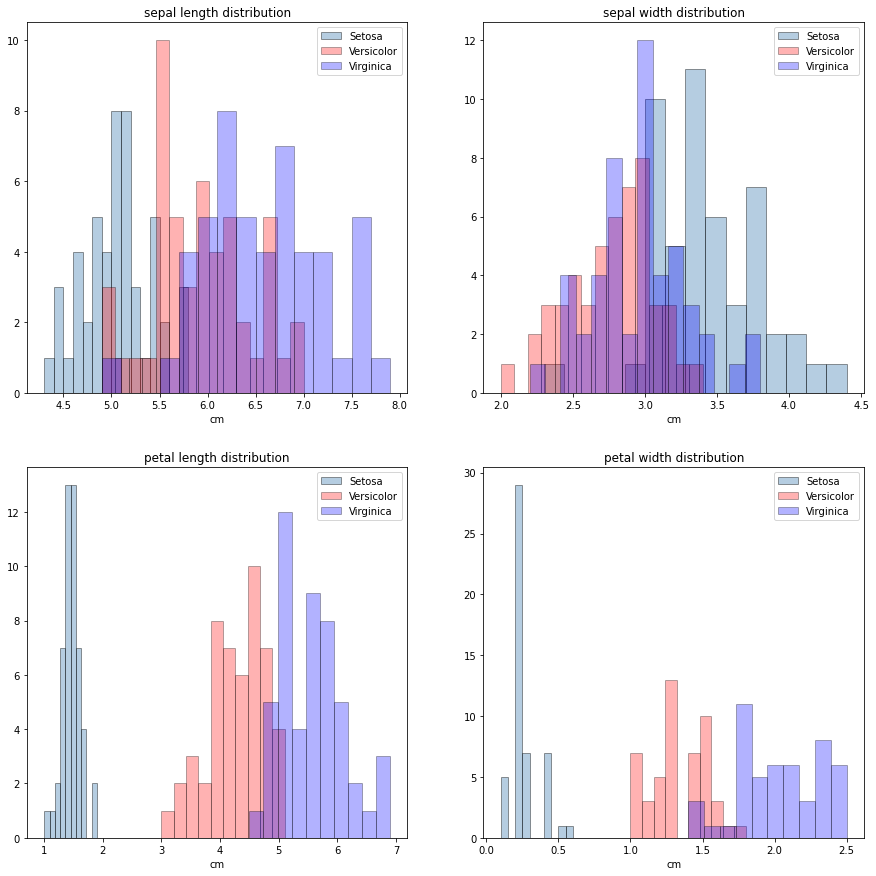

In [14]:
# df.hist("sepal.length",bins=15,edgecolor='black')

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.hist(Se.sepal_length,bins=15,color="steelblue",edgecolor='black',alpha =0.4, label="Setosa")
plt.hist(Vc.sepal_length,bins=15,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.sepal_length,bins=15,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.title("sepal length distribution"), plt.xlabel('cm')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(Se.sepal_width,bins=15,color="steelblue",edgecolor='black',alpha =0.4, label="Setosa")
plt.hist(Vc.sepal_width,bins=15,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.sepal_width,bins=15,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.title("sepal width distribution"), plt.xlabel('cm')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(Se.petal_length,bins=10,color="steelblue",edgecolor='black',alpha =0.4, label="Setosa")
plt.hist(Vc.petal_length,bins=10,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.petal_length,bins=10,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.title("petal length distribution"), plt.xlabel('cm')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(Se.petal_width,bins=10,color="steelblue",edgecolor='black',alpha =0.4, label="Setosa")
plt.hist(Vc.petal_width,bins=10,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.petal_width,bins=10,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.title("petal width distribution"), plt.xlabel('cm')
plt.legend()

Now, we will visualize multiple features with scatter plots to gain some more insights.

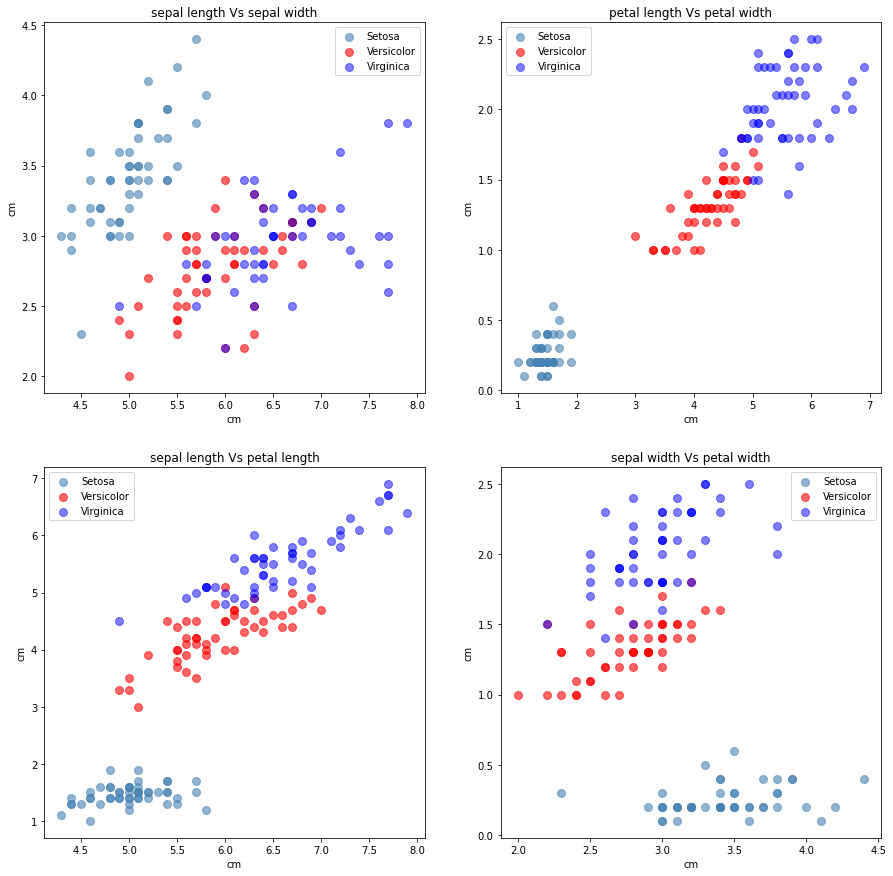

In [15]:
plt.figure(figsize=(15,15))

area = np.pi*20

plt.subplot(2, 2, 1)
plt.scatter(Se.sepal_length,Se.sepal_width, s=area, c="steelblue", alpha=0.6, label="Setosa")
plt.scatter(Vc.sepal_length,Vc.sepal_width, s=area, c="red", alpha=0.6, label="Versicolor")
plt.scatter(Vi.sepal_length,Vi.sepal_width, s=area, c="blue", alpha=0.5, label="Virginica")
plt.title("sepal length Vs sepal width"), plt.xlabel('cm'), plt.ylabel('cm')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(Se.petal_length,Se.petal_width, s=area, c="steelblue", alpha=0.6, label="Setosa")
plt.scatter(Vc.petal_length,Vc.petal_width, s=area, c="red", alpha=0.6, label="Versicolor")
plt.scatter(Vi.petal_length,Vi.petal_width, s=area, c="blue", alpha=0.5, label="Virginica")
plt.title("petal length Vs petal width"), plt.xlabel('cm'), plt.ylabel('cm')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(Se.sepal_length,Se.petal_length, s=area, c="steelblue", alpha=0.6, label="Setosa")
plt.scatter(Vc.sepal_length,Vc.petal_length, s=area, c="red", alpha=0.6, label="Versicolor")
plt.scatter(Vi.sepal_length,Vi.petal_length, s=area, c="blue", alpha=0.5, label="Virginica")
plt.title("sepal length Vs petal length"), plt.xlabel('cm'), plt.ylabel('cm')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(Se.sepal_width,Se.petal_width, s=area, c="steelblue", alpha=0.6, label="Setosa")
plt.scatter(Vc.sepal_width,Vc.petal_width, s=area, c="red", alpha=0.6, label="Versicolor")
plt.scatter(Vi.sepal_width,Vi.petal_width, s=area, c="blue", alpha=0.5, label="Virginica")
plt.title("sepal width Vs petal width"), plt.xlabel('cm'), plt.ylabel('cm')
plt.legend()


We can definitely see some blobs forming from these visualizations. "Setosa" class unsally stands out from the other two classes but the sepal width vs sepal length plot shows "versicolor" and "virginica" classes will more challenging to classify compared to "setosa" class.

<a id=train></a>
## Training the model

[Scikit-learn](https://scikit-learn.org/stable/) is a free machine learning library for Python which features various classification, regression and clustering algorithms.

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

In [89]:
df = pd.read_csv('iris_data.csv')
# df.dtypes
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [84]:
train_X, test_X, train_y, test_y = train_test_split(df[df.columns[0:4]].values,
                                                    df.variety.values, test_size=0.25)

modelDT = DecisionTreeClassifier().fit(train_X, train_y)
DT_predicted = modelDT.predict(test_X)

modelRF = RandomForestClassifier().fit(train_X, train_y)
RF_predicted = modelRF.predict(test_X)

<a id=evaluate></a>
## Model Evaluation

#### Decision Tree classifier

In [85]:
print(metrics.classification_report(DT_predicted, test_y))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.78      0.88      0.82         8
   Virginica       0.93      0.88      0.90        16

    accuracy                           0.92        38
   macro avg       0.90      0.92      0.91        38
weighted avg       0.93      0.92      0.92        38



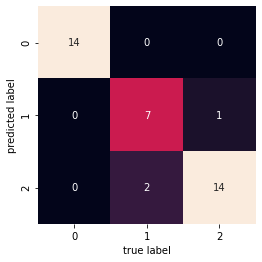

In [86]:
mat = metrics.confusion_matrix(test_y, DT_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### Ramdom Forest Classifier

In [87]:
print(metrics.classification_report(RF_predicted, test_y))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.78      0.88      0.82         8
   Virginica       0.93      0.88      0.90        16

    accuracy                           0.92        38
   macro avg       0.90      0.92      0.91        38
weighted avg       0.93      0.92      0.92        38



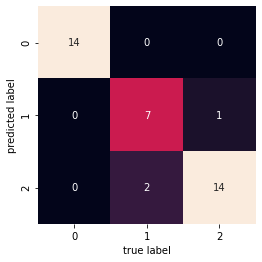

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(test_y, RF_predicted)
sns.heatmap(mat.T, square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

[colab notebook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb)

<a id=engineer></a>
## Feature Engineering

When generating new features, the product between two features is usually not recommended to engineer unless it makes a magnification of the situation. Here, we use two new features, petal hypotenuse and petal product.

In [24]:
#Generate new features
df = pd.read_csv('iris_data.csv')
df['petal_hypotenuse'] = np.sqrt(df["petal_length"]**2+df["petal_width"]**2)
df['petal_product']=df["petal_length"]*df["petal_width"]

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,variety,petal_hypotenuse,petal_product
145,6.7,3.0,5.2,2.3,Virginica,5.685948,11.96
146,6.3,2.5,5.0,1.9,Virginica,5.348832,9.50
147,6.5,3.0,5.2,2.0,Virginica,5.571355,10.40
148,6.2,3.4,5.4,2.3,Virginica,5.869412,12.42
149,5.9,3.0,5.1,1.8,Virginica,5.408327,9.18


(Text(0.5, 1.0, 'petal product distribution'), Text(0.5, 0, 'cm'))

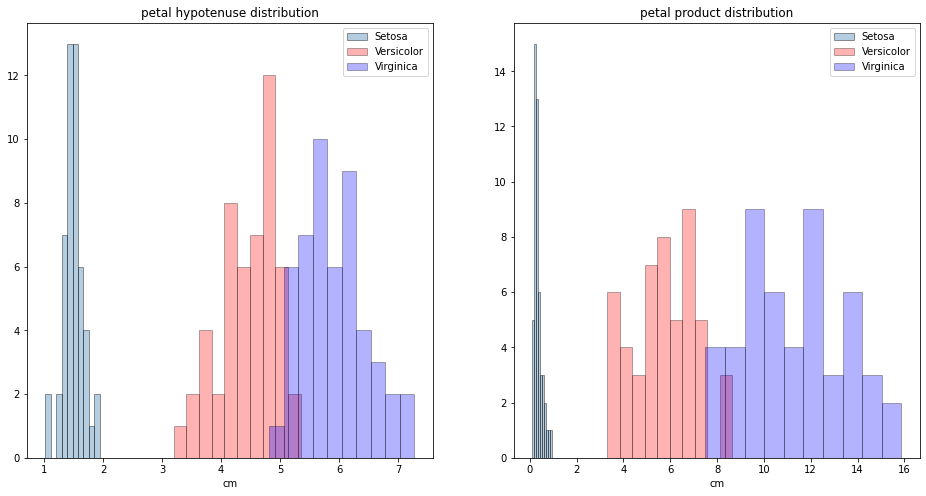

In [26]:
Se= df.loc[df.variety =='Setosa', :]
Vc= df.loc[df.variety =='Versicolor', :]
Vi= df.loc[df.variety =='Virginica', :]

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.hist(Se.petal_hypotenuse,bins=10,color="steelblue",edgecolor='black',alpha =0.4 , label="Setosa")
plt.hist(Vc.petal_hypotenuse,bins=10,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.petal_hypotenuse,bins=10,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.legend()
plt.title("petal hypotenuse distribution"), plt.xlabel('cm')

plt.subplot(1, 2, 2)
plt.hist(Se.petal_product,bins=10,color="steelblue",edgecolor='black',alpha =0.4, label="Setosa")
plt.hist(Vc.petal_product,bins=10,color='red',edgecolor='black', alpha =0.3, label="Versicolor")
plt.hist(Vi.petal_product,bins=10,color='blue',edgecolor='black', alpha =0.3, label="Virginica")
plt.legend()
plt.title("petal product distribution"), plt.xlabel('cm')

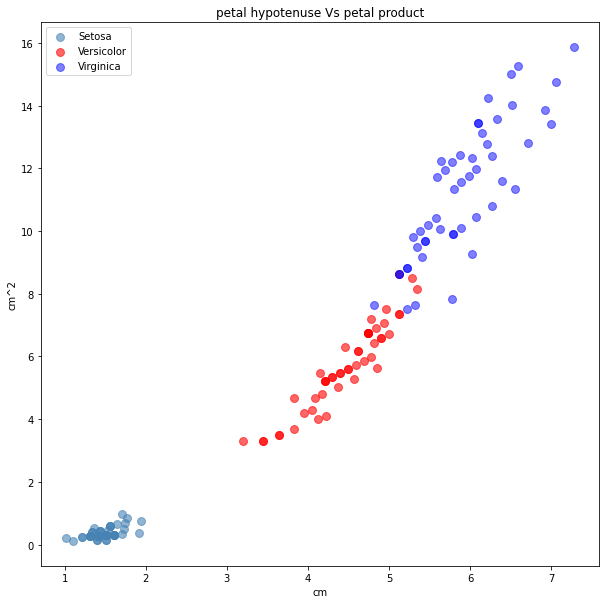

In [34]:
plt.figure(figsize=(10,10))

area = np.pi*20

plt.scatter(Se.petal_hypotenuse,Se.petal_product, s=area, c="steelblue", alpha=0.6, label="Setosa")
plt.scatter(Vc.petal_hypotenuse,Vc.petal_product, s=area, c="red", alpha=0.6, label="Versicolor")
plt.scatter(Vi.petal_hypotenuse,Vi.petal_product, s=area, c="blue", alpha=0.5, label="Virginica")
plt.title("petal hypotenuse Vs petal product"), plt.xlabel('cm'), plt.ylabel('cm^2')
plt.legend()


### Train with Engineered features

Now, let's replace two petal features with two new features we generated. 

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,petal_hypotenuse,petal_product
0,5.1,3.5,1.4,0.2,Setosa,1.414214,0.28
1,4.9,3.0,1.4,0.2,Setosa,1.414214,0.28
2,4.7,3.2,1.3,0.2,Setosa,1.315295,0.26
3,4.6,3.1,1.5,0.2,Setosa,1.513275,0.30
4,5.0,3.6,1.4,0.2,Setosa,1.414214,0.28


In [29]:
df2 = df.loc[:,["sepal_length","sepal_width","petal_hypotenuse","petal_product","variety"]]
df2.dtypes

sepal_length        float64
sepal_width         float64
petal_hypotenuse    float64
petal_product       float64
variety              object
dtype: object

In [30]:
train_X, test_X, train_y, test_y = train_test_split(df2[df2.columns[0:4]].values,
                                                    df2.variety.values, test_size=0.25)

from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier().fit(train_X, train_y)
DT_predicted = modelDT.predict(test_X)

from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier().fit(train_X, train_y)
RF_predicted = modelRF.predict(test_X)

In [31]:
print(metrics.classification_report(DT_predicted, test_y))
# print(metrics.classification_report(RF_predicted, test_y))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.90      1.00      0.95         9
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



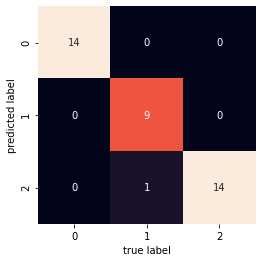

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(test_y, DT_predicted)
# mat = confusion_matrix(test_y, RF_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 

Reference - [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb)

<a id=annotate></a>
## Annotations

#### Image labels

For classification models, we have a single label for each set of images in the same class. Annotations can be made very easily.

![](images/flowers.png)

#### Bounding boxes

We usually use rectangular bounding boxes for object detection. Detection Models like YOLO and Faster-RCNN use this type of annotations. Bounding boxes are ususally represented by either the coordinates (x1,y1) lower left corner or (x2,y2) upper right corner of the box, followed by height and wigth of the bounding box.

![](images/Umbrella.png)

#### Segmentation

##### Polygonal Segmentation

Bounding boxes are simple but not ideal for all types of objects as we have to frame every object in a rectangular box. To solve this problem, polygonal segmentation is introduced. With this method, we can annotate the exact features of the objects with polygons. The image below is from one of my projects for segmentation of temples in ASEAN.

![](images/Polyseg.png)

##### Semantic Segmentation

This technique takes segmentation to the pixel level. A particular class is assigned to every pixel in the image. Semantic segmentation is used mainly in situations where there is a very significant environmental context. It is used, for instance, in self-driving cars and robotics so that the models understand the environment in which they operate.

![](images/sseg.png)

<a id=imagedata></a>
### Image Datasets

[COCO dataset](https://cocodataset.org/)

[Google's Open images V6](https://storage.googleapis.com/openimages/web/index.html)

[ImageNet](http://www.image-net.org/)

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

[MNIST](http://yann.lecun.com/exdb/mnist/)

[PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html)

<a id=tools></a>
### Annotation tools

[Makesense](makesense.ai)

[LabelImg](https://github.com/tzutalin/labelImg)

### References

[Tensorflow](https://www.tensorflow.org/tutorials/images/classification), [Google images](https://www.google.com/imghp?hl=en)
, [Sabina Pokhrel's article](https://towardsdatascience.com/image-data-labelling-and-annotation-everything-you-need-to-know-86ede6c684b1)
, [Cityscapes dataset](https://www.cityscapes-dataset.com/examples/#coarse-annotations)